# Estimating the Flare Rate for TIC 272272592
___ 

### 1.0 - Loading Full-Cadence Lightcurve Data

In [218]:
import os, sys
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import lightkurve as lk
from lightkurve.search import search_lightcurve

plt.rcParams['font.size'] = 20
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20


In [219]:
target_id = 272272592 # 
search_result = lk.search_lightcurve(f'tic {target_id}', author='SPOC')
sector = [s.split(" ")[-1] for s in search_result.mission] # available sectors

In [249]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,272272592,0.0
1,TESS Sector 15,2019,SPOC,120,272272592,0.0


In [270]:
LC = [search_lightcurve(target=f'tic {target_id}', mission='TESS', sector=f"{int(ss)}",
                        author='SPOC').download() for ss in sector]
LC = [llc.remove_nans() for llc in LC]

Text(0.5, 1.0, 'Stiched lightcurve TIC 272272592')

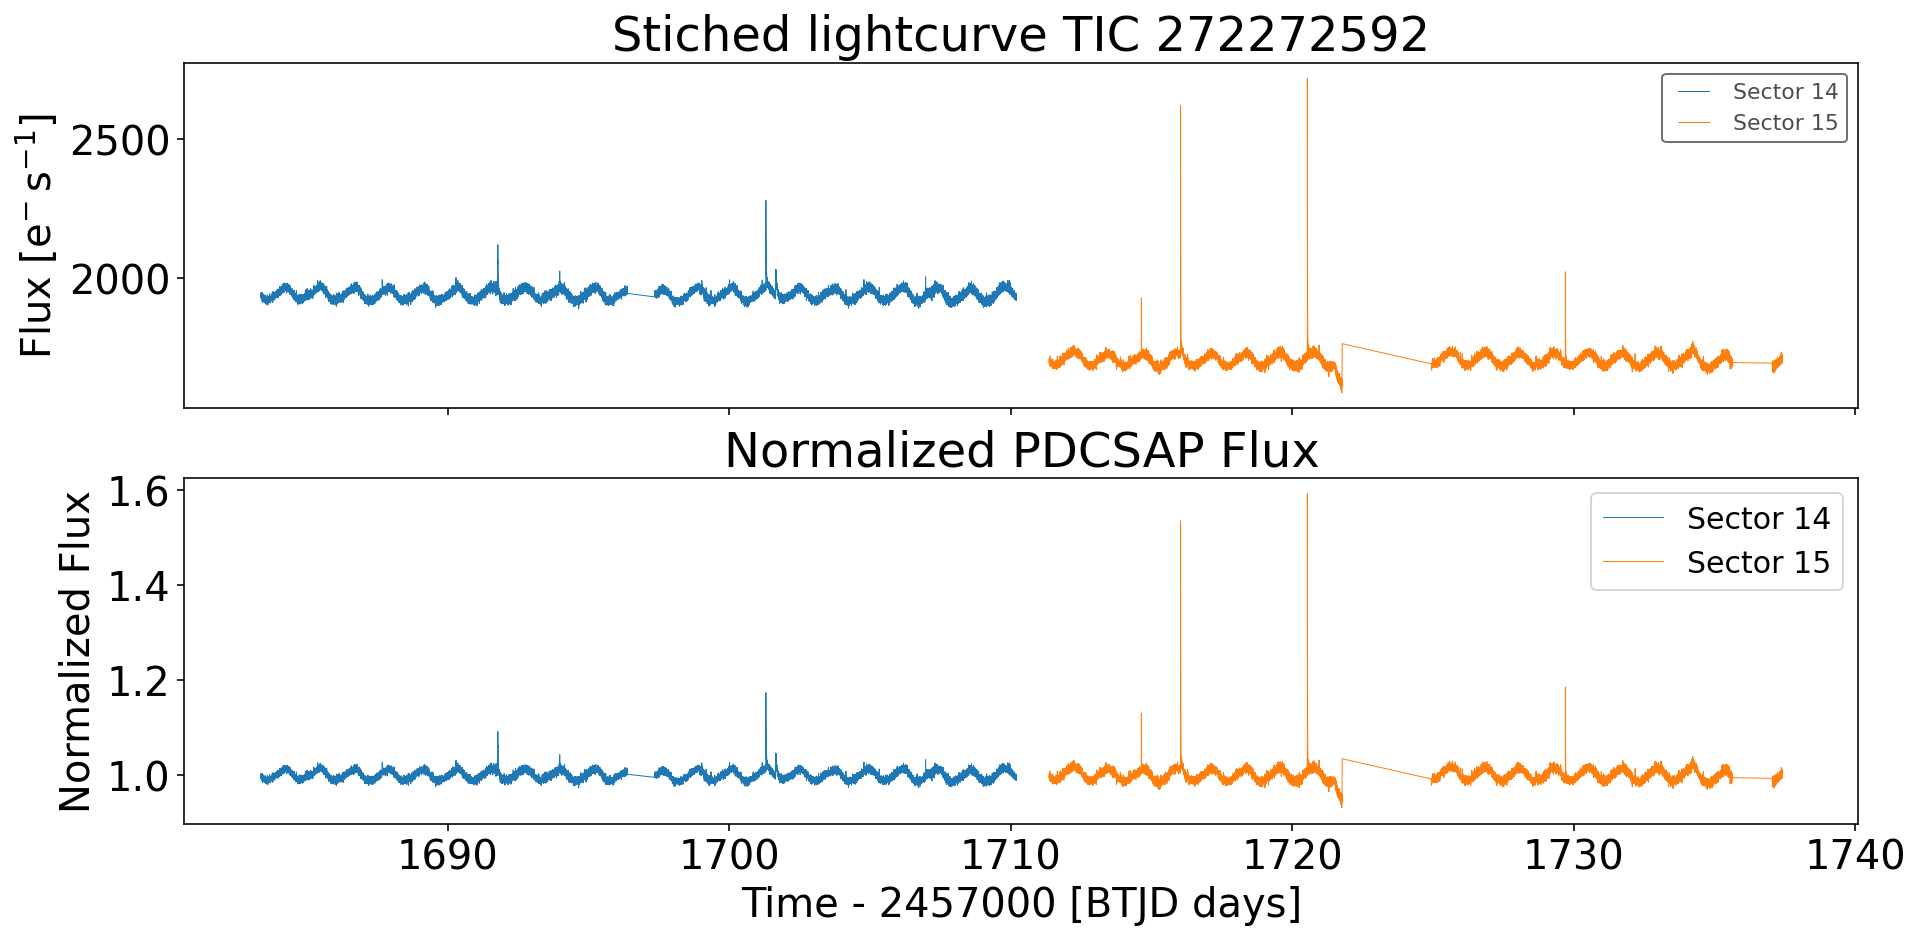

In [271]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,7), sharex=True)
for i in range(len(LC)):
    LC[i].plot(ax=ax[0], label=f"Sector {sector[i]}", xlabel='')
    LC[i].normalize().plot(ax=ax[1], label=f"Sector {sector[i]}", title='HEEEE')

    
plt.legend(fontsize=15)
ax[1].set_title("Normalized PDCSAP Flux")
ax[0].set_title(f"Stiched lightcurve TIC {target_id}")

In [298]:
def stich_lcs(lc_list, mode='raw'):
    """Function retuns stiched numpy arrays (i.e values) from each sector.
    
    Input: 
    ------
    lc_list (list): list of lightkurve targets
    mode (str): default mode is raw where it will return the flux in e-/s units. Normalized will normalize the lc to 1
    """
    
    
    if mode=='raw':
        return (np.concatenate([lc_list[j].time.value for j in range(len(lc_list))]),
    np.concatenate([lc_list[j].flux.value for j in range(len(lc_list))]),
    np.concatenate([lc_list[j].flux_err.value for j in range(len(lc_list))]))
    
    elif mode=='normalized':
        return (np.concatenate([lc_list[j].normalize().time.value for j in range(len(lc_list))]),
    np.concatenate([lc_list[j].normalize().flux.value for j in range(len(lc_list))]),
    np.concatenate([lc_list[j].normalize().flux_err.value for j in range(len(lc_list))]))
    
    

In [301]:
# Stich light curve data
time0, flux0, flux_err0 = stich_lcs(LC, mode='raw') # raw counts
time, flux, flux_err = stich_lcs(LC, mode='normalized')# normalized

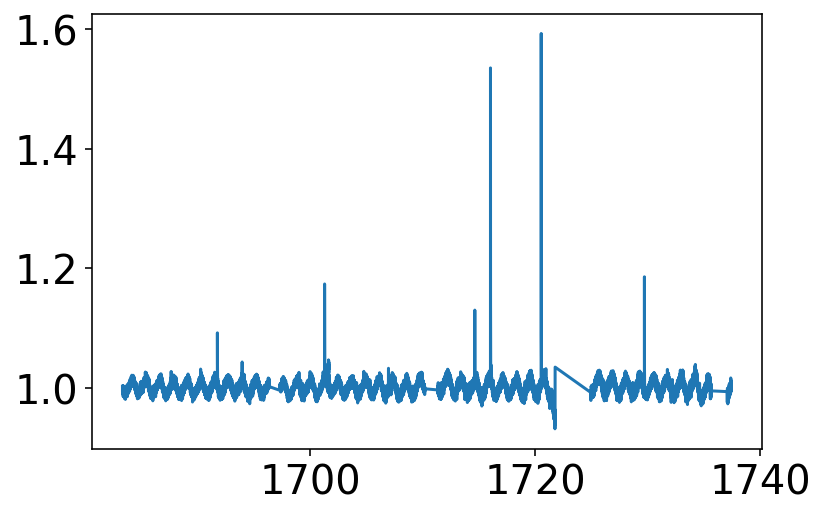

In [303]:
plt.plot(time, flux)